APRENDIZAJE AUTOMÁTICO

POR QUÉ IBAMOS A TENER QUE PONER LOS VALORES ÚNICOS SI YA SE NOS MUESTRAN EN LA DESCRIPCION.TXT?
Quitamos outliers estaría SUPER CHULO seleccionar todas aquellas columnas que puedan tener outliers y  eliminar todas las filas del tirón con estos de la tabla
modificamos nan de cualquier var
Variables numéricas estudiar valores máximos y mínimos

Identifica valores únicos de la columna 

• El tipo (categórica sin orden, categórica con orden, discreto o continuo).

• Si hay valores nulos o no (puedes utilizar la salida de la pregunta 3 o buscar específicamente en la columna a tratar). 

• En caso de que la columna tenga valores nulos, el tratamiento que se te ocurre para trabajar con ellos. 

• Si la columna es numérica obtén valores mínimo y máximo; estudia si hay outliers.

• Especifica si decides o no eliminar la columna, porque su aportación puede ser irrelevante en procesos de modelado posteriores. 

• Si es necesaria una recodificación de la columna, por ser categórica u otra razón, explica por qué se hace esta conversión y qué método empleas para llevarla a cabo.




In [31]:
import numpy as np ; import seaborn as sns; import pandas as pd; import matplotlib
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',100)
try:
    data = pd.read_csv('C:/Users/juanj/Documents/3ercuatri/aprendizaje automatico/dataset_housing.csv')
except:
    data = pd.read_csv('C:/Users/juanj/OneDrive/Documentos/3er cuatri/dataset_housing.csv')
    

data[['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LandSlope','Neighborhood','YearBuilt' ,'YearRemodAdd','GarageCars','GarageArea','GarageQual','GarageCond','GarageType','GarageYrBlt','GarageFinish','OverallQual','OverallCond','SalePrice']]
pd.set_option('display.max_rows',None)

#data.Alley = data.Alley.replace({'nan': 'No access'})


tabla_nules=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
#MISSING VALUES ORIGINALES

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


4.ANÁLISIS DE LAS VARIABLES DEL DATASET DE VIVIENDAS

1.Id: se trata de una variable no numérica, ya que no se usan los números para establecer un orden sino para identificar nuestras muestras. El rango del id coge valores desde 1 a 1460 y se asigna según la posición de la fila en la tabla. Como ya tenemos una columna mostrándonos el index de las filas, podríamos llegar a prescindir de dicha columna.


3. MSZoning : Esta variable categórica clasifica de forma general la zona en la que se encuentra la vivienda. No hay valores nulos y la mayoría de casas pertenecen al grupo de RL (residencial de baja densidad de población). 

Además, no encontramos ninguna zona clasificada como agricultura, indsutrial o residencial de baja densidad en parque, por lo que procedemos a los dummies con 5 valores.


In [34]:
lc_dummies = pd.get_dummies(data['MSZoning'], dtype=int) #pone un 1 si está en esa fila
lc_dummies
print(lc_dummies[lc_dummies.iloc[:] == 1].sum())
data = pd.get_dummies(data, drop_first=True, columns=['MSZoning'], dtype=int) 


KeyError: 'MSZoning'

 5. LotArea : Es una variable numérica que nos indica el área de la vivienda en pies cuadrados. En la tabla no encontramos ningún valor nulo. En cuanto a los outliers, definimos una función que uando los rangos intercuartílicos y recibiendo un DataFrame y el nombre de una columna saca los outliers de esta. Al ver en un histograma cómo son los valores nos damos cuanta de que hay una distribución de cola pesada , por lo que haremos una trasformación logarítmica y así tener una distribución que se asemeje mucho más a una normal, que es lo que buscaremos en el futuro para el aprendizaje de nuestros modelos.

 Encontramos 69 filas con outliers; la gran mayoría de estos se sitúa por encima de la media. No hemos visto adecuado quitarlos ya que son verosímiles y nos aportan una muestra de las propiedades con más extensión. Decimos que son verosímiles al comprobar que se muestran las caracterísitcas de correlación, por ejemplo, al coger esta variable con SalePrice. Tal y como mostraremos posteriormente en una matriz de correclación, ambas están correlacionadas de forma positiva, por lo que cuando una muestra tiene gran extensión también suele tener un valor por encima del medio. 

[[<Axes: title={'center': 'LotArea'}>]]
precio----area(outlier)
[385000, 10.825183649068833]
[172500, 7.8804263442924]
[91000, 7.3752557780097545]
[164500, 8.281723990411392]
[176000, 8.080237416216702]
[130000, 7.8328075165248645]
[215000, 10.366277727263562]
[177000, 7.6577552711348655]
[475000, 10.04107321548869]
[130000, 7.8328075165248645]
[148500, 7.731930721948486]
[235000, 10.143252204866574]
[110000, 8.160518247477505]
[167240, 8.009695357742922]
[112000, 7.426549072397305]
[106000, 7.533158807455563]
[192500, 8.065265208897733]
[94500, 7.426549072397305]
[89500, 7.426549072397305]
[110500, 8.263590432617319]
[277000, 11.976659481202368]
[241500, 10.573980042531268]
[375000, 12.279532193216468]
[228950, 12.011638020852416]
[85000, 7.860185057472165]
[154000, 7.803026643632217]
[118000, 7.426549072397305]
[240000, 10.880064025283644]
[192000, 8.065265208897733]
[145000, 10.453053004618049]
[239000, 10.017708696626151]
[135000, 8.125039097367745]
[85400, 7.426549072397305]
[1225

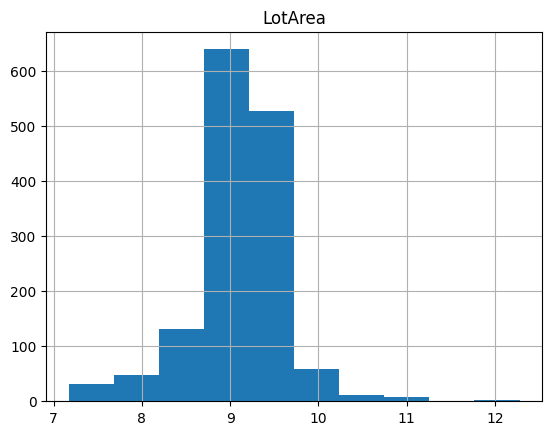

In [24]:
def saco_outliers(df,columna): 
  #despues de sacar los outliers sacas el minimo y el maximo.
  def is_outlier_IQR(df):
      Q1=df.quantile(0.25)
      Q3=df.quantile(0.75)
      IQR = Q3-Q1
      return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))

  tabla_outliers=(is_outlier_IQR(data[columna]))  #.sum() 

  filas_outl=[]
  for ind,boole in tabla_outliers.items():  #hay 69 outliers
      if boole==True: filas_outl.append(ind)

  return df[columna].iloc[filas_outl]  #columnas con outliers: YearBuilt, LotArea #columnas sin: YearRemodAdd
                                       
log_lotarea=pd.DataFrame(np.log(data['LotArea']))
data['LotArea']=log_lotarea
print(log_lotarea.hist())  #transformación logarítmica


out_lotarea=saco_outliers(data, 'LotArea')
print('precio----area(outlier)')
for ind,x in out_lotarea.items():
    print([data.iloc[ind]['SalePrice'],x])








7. Alley :Esta columna, que traducida al español sería ‘callejón’ posee casi en su totalidad valores NaN, aunque esto no significa que no tengamos toda esa información: en este caso podemos ver cómo Pandas ha confundido el valor NA (No Alley Access) con NaN, así que procedemos a modificar dicha columna del DataFrame para quitar los NaN por No access. De hecho, si abrimos el csv sin pandas, podemos visualizar que pone en siempre NA en vez de NaN, por lo que Pandas manipula esta columna de forma errónea.

Además, al ser una variable categórica sin orden procedemos con los dummies, indicando drop_first=True para quitar una columna (Sabremos que es Alley_Grvl cuando las dos columnas restantes sean False)

In [ ]:
data.fillna({x:'NO ACCESS' for x in ['Alley']}, inplace=True)


data = pd.get_dummies(data, drop_first=True, columns=['Alley'], dtype=int) 
data
#data.drop('Alley',axis=1,inplace=True)
#print(data['LotArea'].isnull().any())
# #pd.get_dummies(data['Alley'],dtype= int)


9. LandContour : Variable categórica sin orden que indica cómo de llano es el terreno de la propiedad.
Tiene cuatro posibles valores, que serían: cerca de llano, aumento significativo del nivel de la calle ,baja Depresióny pendiente importante de lado a lado . No tiene nan y la moda es level (cercano a plano). Al ser variable categórica la pasamos a dummies

In [26]:
lc_dummies = pd.get_dummies(data['LandContour'], dtype=int) #pone un 1 si está en esa fila
lc_dummies
lc_dummies[lc_dummies.iloc[:] == 1].sum()



Bnk      63.0
HLS      50.0
Low      36.0
Lvl    1311.0
dtype: float64

11. LandSlope: Variable categórica con orden que se refiere a la pendiente de la propiedad. Hay 3 grados: prendiente suave, moderada y severa. No tiene nan y la gran mayoría de muestras tiene una pendiente gentil. Como solo hay 65 casos de moderada y 13 de severa, para simplificar los datos hemos decidido unificar estas dos categorías en una llamada pendiente considerable.

In [27]:
lc_dummies = pd.get_dummies(data['LandSlope'], dtype=int) #para poder ver los valores de cada fila
lc_dummies
print(lc_dummies[lc_dummies.iloc[:] == 1].sum())


data = data.replace({'LandSlope': {'Mod':'Considerable','Sev': 'Considerable'}})
data['LandSlope']

Gtl    1382.0
Mod      65.0
Sev      13.0
dtype: float64


0                Gtl
1                Gtl
2                Gtl
3                Gtl
4                Gtl
5                Gtl
6                Gtl
7                Gtl
8                Gtl
9                Gtl
10               Gtl
11               Gtl
12               Gtl
13               Gtl
14               Gtl
15               Gtl
16               Gtl
17               Gtl
18               Gtl
19               Gtl
20               Gtl
21               Gtl
22               Gtl
23               Gtl
24               Gtl
25               Gtl
26               Gtl
27               Gtl
28               Gtl
29               Gtl
30               Gtl
31               Gtl
32               Gtl
33               Gtl
34               Gtl
35               Gtl
36               Gtl
37               Gtl
38               Gtl
39               Gtl
40               Gtl
41               Gtl
42               Gtl
43               Gtl
44               Gtl
45               Gtl
46               Gtl
47           

13. YearBuilt: Variable numérica donde encontramos casas construidas desde 1872 hasta 2010, la mayoría de las casas del DataFrame fueron construidas después del año 2000. Además, no encontramos valores nulos. Si hacemos un tratamiento de outliers nos salen algunas casas de la década de 1870, pero no son realmente outliers ya que las casas fueron todas construidas entre 1872(min) y 2010(max) (por ejemplo, un dato que sí clasificaríamos como atípico sería una casa construida en 1492). La media del año de contrucción es 1971.

Para evitar la dispersión de cara a nuestro futuro modelo podríamos agrupar nuestras muestras por intervalos de 5 o 10 años. Para tener en esta columna
solamente múltiplos de 10 podríamos truncar los años, y por tanto estaríamos agrupandolos en intervalos de 10, reduciendo así los outliers a solamente 2. Para hacer esto le quitaremos a cada año su último dígito (ej: 1972-2)

<Axes: >

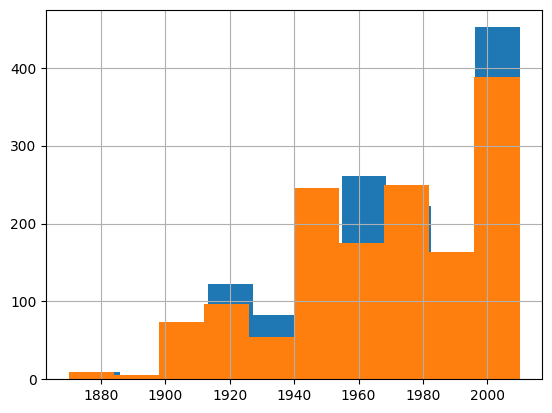

In [28]:
data['YearBuilt'].hist() #color azul (antes de los intervalos)
for fila in data['YearBuilt']:
    
    data = data.replace({'YearBuilt': {fila:fila-int(str(fila)[3])}})
data['YearBuilt']
data['YearBuilt'].hist() #color naranja


 15. YearRemodAdd: Variable numérica que se refiere a una fecha en la que se remodeló la casa. La media del año de remodelación es 1985 y la primera reforma data de 1950 y la última del 2010. Al tratarse de un intervalo más pequeño que el de year built los datos se encuentran menos separados y por tanto no encontramos outliers

In [29]:
data['YearRemodAdd'].describe().T[['min']]
print(saco_outliers(data, 'YearRemodAdd')) #ninguno
print((data['YearRemodAdd'].isna().any()))

Series([], Name: YearRemodAdd, dtype: int64)
False


17. OverallQual: Es una calificación (variable categórica ordenada) que puede coger valores del uno al diez que se refiere al acabado de la casa y l .materiales usados para construirla. En el DataFrame encontramos solo dos casas con un rate de 1 (de hecho se cuentan como outliers), y 3 con el valor 2, por lo que procedemos a hacer un subgrupo para valores menores o iguales a tres, modificación que se agradecerá para poder viusalizar mejor los datos. La moda es el valor cinco, que cuenta con un poco más de muestras que 6 y 7.

In [30]:
lc_dummies = pd.get_dummies(data['OverallQual'], dtype=int) #para poder ver los valores de cada fila
lc_dummies
print(lc_dummies[lc_dummies.iloc[:] == 1].sum())

data = data.replace({'OverallQual': {1:'<=3', 2: '<=3',3: '<=3'}})

lc_dummies = pd.get_dummies(data['OverallQual'], dtype=int) #para poder ver los valores con el nuevo grupo
lc_dummies
print(lc_dummies[lc_dummies.iloc[:] == 1].sum())

1       2.0
2       3.0
3      20.0
4     116.0
5     397.0
6     374.0
7     319.0
8     168.0
9      43.0
10     18.0
dtype: float64
4      116.0
5      397.0
6      374.0
7      319.0
8      168.0
9       43.0
10      18.0
<=3     25.0
dtype: float64


19. SalePrice: Variable numérica discreta que indica el precio de venta de la propiedad. Tiene de media 180921, precio máximo 755000 y de mínimo 34900.
Encontramos 32 outliers, lo que quiere decir que los valores están menos dispersos que en LotArea (además de que Sale Price se mueve en un intervalo mucho mayor). Este caso viene a ser muy parecido al anterior de LotArea : vemos un error eliminar las filas con outliers o modificarlas, ya que perdemos o cambiamos la información.

En lugar de ello, preferimos contar con información en nuestro dataset de casas que son más grandes y lujosas a pesar de que sean una minoría y nuestro programa pueda llegar a verlos como un dato no deseado. No hay que olvidar que probablemente si quisiésemos en un momento hacer un grupo con ellos nos darían una información exclusiva sobre sus caracterísitcas en común.

De nuevo, podemos hacer intervalos de precios, pero esta vez haremos una transformación logarítmica ya que en el histograma como podemos apreciar hay una distribución de cola pesada y queremos asemejarla a una gaussiana.



180921.19589041095
min    34900.0
Name: SalePrice, dtype: float64
11      345000
53      385000
58      438780
112     383970
151     372402
161     412500
178     501837
185     475000
224     386250
231     403000
278     415298
309     360000
313     375000
320     342643
321     354000
336     377426
349     437154
378     394432
389     426000
440     555000
473     440000
477     380000
481     374000
496     430000
515     402861
527     446261
585     369900
591     451950
608     359100
642     345000
644     370878
654     350000
661     402000
664     423000
678     372500
688     392000
691     755000
702     361919
718     341000
769     538000
774     395000
798     485000
803     582933
825     385000
877     350000
898     611657
987     395192
990     348000
1046    556581
1142    424870
1169    625000
1181    392500
1182    745000
1228    367294
1243    465000
1267    378500
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, dt

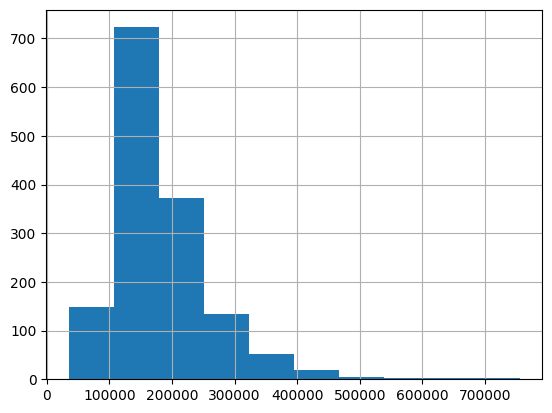

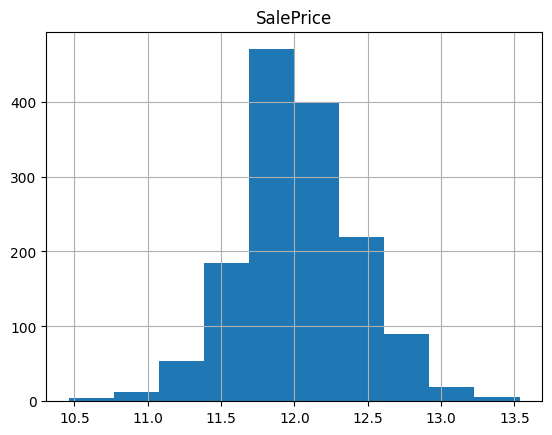

In [32]:

print(data['SalePrice'].mean())
print(data['SalePrice'].describe().T[['min']])
print(saco_outliers(data, 'SalePrice')) #ninguno
print((data['YearRemodAdd'].isna().any()))


data['SalePrice'].hist()
log_price=pd.DataFrame(np.log(data['SalePrice']))
data['SalePrice']=log_price
print(log_price.hist())  #transformación logarítmica






In [119]:
saco_outliers(data,'SalePrice')

11      340000
53      380000
58      440000
112     380000
151     370000
161     410000
178     500000
185     480000
224     390000
231     400000
278     420000
309     360000
313     380000
320     340000
321     350000
336     380000
349     440000
377     340000
378     390000
389     430000
409     340000
440     560000
473     440000
477     380000
481     370000
496     430000
515     400000
527     450000
585     370000
591     450000
608     360000
642     340000
644     370000
654     350000
661     400000
664     420000
678     370000
688     390000
691     760000
692     340000
702     360000
718     340000
763     340000
769     540000
774     400000
798     480000
803     580000
825     380000
877     350000
898     610000
981     340000
987     400000
990     350000
994     340000
1046    560000
1058    340000
1142    420000
1169    620000
1181    390000
1182    740000
1228    370000
1243    460000
1267    380000
1268    380000
1310    340000
1353    410000
1373    47

In [36]:

pd.set_option('display.max_rows',500)
print(type(data.isnull().sum()))
tabla_nules=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
#es necesario para quitar las filas con ceros hacer a la variable 'a' un dataframe?
tabla_nules = tabla_nules[tabla_nules.iloc[:,0] != 0]
#tabla_nules=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
pd.set_option('display.max_rows',None)  #AQUÍ NO SALE TODO POQUE 
#tabla_nules




#Columnas con nan

<class 'pandas.core.series.Series'>


In [38]:
tabla_nules = tabla_nules[tabla_nules.iloc[:,0] != 0]
tabla_nules

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


max    215245.0
Name: LotArea, dtype: float64

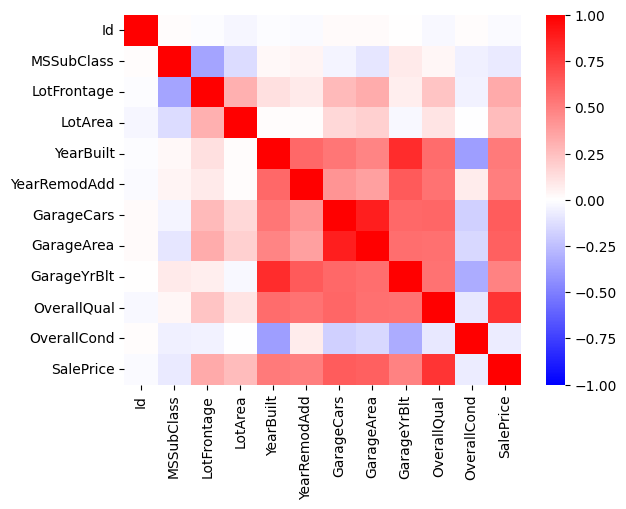

In [5]:
data.fillna({x:data['LotFrontage'].mean() for x in ['LotFrontage']}, inplace=True)
new_data = pd.DataFrame(data[['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LandSlope','Neighborhood','YearBuilt' ,'YearRemodAdd','GarageCars','GarageArea','GarageQual','GarageCond','GarageType','GarageYrBlt','GarageFinish','OverallQual','OverallCond','SalePrice']])
data_num = new_data.loc[:,new_data.dtypes != object]
data_num.corr()
sns.heatmap(data_num.corr(), cmap="bwr", vmin=-1, vmax=1)


data['LotArea'].describe().T[['max']]


EJERCICIO 5: ¿FILAS ELIMINADAS?

En nuestro caso hemos eliminado 6 muestras debido a Street porque nos habíamos encontrado con el hecho de que solo 6 filas tenían gravel y el resto estaban pavimientadas. Como la diferencia era abismal, no vimos mucho sentido en mantener aqullas calles sin pavimentar y las quitamos. Por ello, al contar con solo propiedades en calles pavimentadas, consideramos oportuno eliminar la columna al no existir diferencia entre nuestros datos.

En Utilities, al igual que en Street, si eliminamos la unica vivienda con valor 'NoSeWa' vamos a tener el mismo valor para toda la categoría para volver a borrar después esta columna. 

Por tanto, hemos optado por eliminar filas que fuesen una excepción en los datos con el fin de poder tener un dataframe con menos columnas y que fuese más sencillo de leer. Tal vez, si no hubiésemos recurrido a modificar ciertos valores o a agrupar en intervalos en determinadas columnas, nuestra información necesitaría un mayor procesado y a lo mejor tendríamos que haber recurrido a quitar alguna fila más.

¿EVOLUCIÓN VALORES NULOS?

Podemos observarlos viendo 
